# The Euler Method

In this notebook we will see how the Euler method works. Despite that the Euler method is efficient in many problems we will see one example in which the solution derived from the Euler method diverges. This problem is well-known in the world of Physics, a Harmonic ocsillator.<br>
To overcome this issue we need to use a modified version of the Euler method. You can find it in another notebook.

## 0. Importing required libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Introduction

Suppose we want to solve the following differential equation: <br><br>
&emsp; $\frac{dy(t)}{dt} = f(t,y) $. <br><br>
By definition we know <br><br>
&emsp; $\frac{dy(t)}{dt} \approx \frac{y(t_{n+1})-y(t_n)}{h}$. <br><br>
Therefor, the value of $y$ in the time step $n+1$, depends on the value of the function on time step $n$. If we continue this procedure to the initial time, i.e. $t_0$, that tells us to find out the solution we have to know the initial condition(s). <br>
The **Euler** method simply is finding the value of function with above definition. (some references might use $\Delta t$ instead of $h$). <br><br>
$y_{n+1} = y_n + h\times f(t,y_n)$ &emsp; $\star$

### 1.1. Simple decay or exponential growth
The equation simply is: <br><br>
$\frac{dx}{dt}=kx$ &emsp; (1.1), <br><br> where $k$ is a constant. The sign of $k$ will reveal that whether this is a growth or decay. <br>
The (1.1) equation has analytic solution: <br><br>
$x(t)=Ce^{kt}$ &emsp; (1.2), <br><br>
where $C$ is a constant which has to be determined with specific constrains on the problem.<br>
If we assum $k=2$, then we can find different curves on x vs t plot for different values of $C$. 

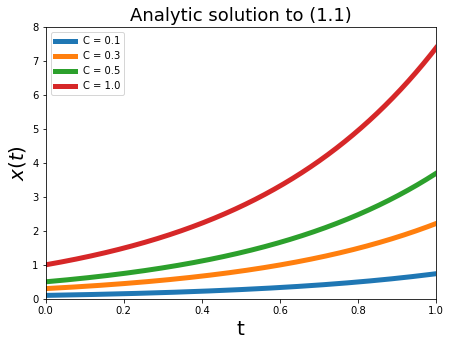

In [4]:
k = 2
C = np.array([0.1,0.3,0.5,1]) # For assigning values for constant C
t = np.linspace(0,1,1000)     # Different variable t, for passing to the function
def X_t(C,k,t):               # Analytic answer to (1.1) equation
    return C*np.exp(k*t)

'''With the following lines we plot the function for different values of C'''
plt.figure(figsize=(7,5))
plt.title("Analytic solution to (1.1)",fontsize=18)
for c_ in C:
    plt.plot(t,X_t(c_,k,t), lw=5, label="C = %.1f" %c_)
plt.ylim(0,8)
plt.xlim(0,1)
plt.xlabel("t", fontsize = 20)
plt.ylabel("$x(t)$", fontsize = 20)
plt.legend()

Now to test the Euler numerical solution, lets implement it on equation (1.1) for $k=2$, and where $C=0.5$ is given. (Or equivalently when the constrain $ x(t=0)=0.5 $ is given).

In [5]:
'''
    We right a loop that does * (stared equation in section 1).
    However, first we have to set initial conditions.
'''
C = 0.5
k = 2
n = 1000 # number of steps
t_0 = 0 # initial time
t_f = 1 # final time
t = np.linspace(t_0,t_f,n)
y = np.empty(n) # Allocating an array from the memory to store yn
y[0] = 0.5
h = (t_f-t_0)/n # = Delta t or the length of our infinitesimal steps

def f_t_y(y): # defined through LHS (1.1) here we substitute x with y for sake of being united as reference
    return k*y

for i in range(0,n-1):
    y[i+1] = y[i] + h*f_t_y(y[i])

Now we check whether numerical solution is in a sufficient agreement with analytic solution or not. <br>
The simples way is to check derived curves from each approaches.

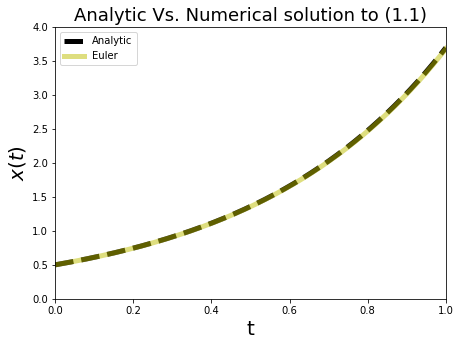

In [6]:
plt.figure(figsize=(7,5))
plt.title("Analytic Vs. Numerical solution to (1.1)",fontsize=18)
plt.plot(t,X_t(0.5 ,k,t), lw=5, label="Analytic" , color="k", linestyle="dashed")
plt.plot(t,y, lw=5, label="Euler" , color="y", alpha=0.5)
plt.ylim(0,4)
plt.xlim(0,1)
plt.xlabel("t", fontsize = 20)
plt.ylabel("$x(t)$", fontsize = 20)
plt.legend()

Pretty cool ! :)

## 2. Failure of the Euler method

The differential equation that we are looking to solve is: <br>
 $ m \frac{d^2 x}{dt^2} = -kx $ <br>
 Or<br>$ \frac{d^2 x}{dt^2} = -\omega_0^2 x$, where $\omega_0^2=k/m$. 

We know the exact solution is depend on the initial conditions: <br>
$ x(t=0) = A ; ẋ(t=0) = 0 $ <br> $x(t)=Acos(\omega_0 t)$ <br>
We can plot this result with the following "Arbitrary" parameters: <br>
$ A = 1 ; \omega_0 = 1 $. <br>
You can modify the values later  with your own convenience. 


In [7]:
A = 1
omega_0 = 1
'''Analytic solutions for position and velocity'''
def X_t(t) :
    return A*np.cos(omega_0*t)
def V_t(t):
    return -A*(omega_0)*np.sin(omega_0*t)

Now we implement the Euler-Cauchy rule and plot the result. <br>
We have two sets of differential equations: <br>
$$\frac{dx}{dt}=v, \;\;\;\;\;\; (1)$$ <br>
$$\frac{dv}{dt}=-\omega_0^2 x. \;\;\;\;\;\; (2)$$ <br>
From Euler method we have: <br>
$$\begin{bmatrix} x^{n+1} \\ v^{n+1} \end{bmatrix} =\begin{bmatrix} x^{n} \\ v^{n} \end{bmatrix} +  \begin{bmatrix} 0 & 1 \\ -\omega_0^2 & 0 \end{bmatrix}\begin{bmatrix} x^{n} \\ v^{n} \end{bmatrix}dt$$ <br>

**Please note that $Y^n=\begin{bmatrix} x^n \\ v^n \end{bmatrix}$**

In [8]:
Y = np.empty((1000, 2))
Y[0] = A, 0
# Create matrix L.
L = np.array([[0., 1.], [-omega_0, 0.]])
t_0 = 0 # Initial time
t_f = 50 # Final time
N = 1000 # number of time intervals
dt = (t_f-t_0)/N # lenght of each small time steps
t = np.linspace(t_0,t_f,N)
# Perform the time stepping.
for i in range(1000-1):
    Y[i+1] = Y[i] + np.dot(L, Y[i])*dt

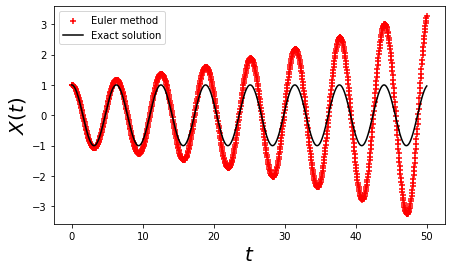

In [9]:
fig1, ax1 = plt.subplots(1,1,figsize=(7,4))
ax1.scatter(t,Y[:,0], color='r' , marker="+", label= "Euler method")
ax1.plot(t,X_t(t), color='k', label="Exact solution")
ax1.set_xlabel("$t$" , fontsize = 20)
ax1.set_ylabel("$X(t)$" , fontsize = 20)
ax1.legend()

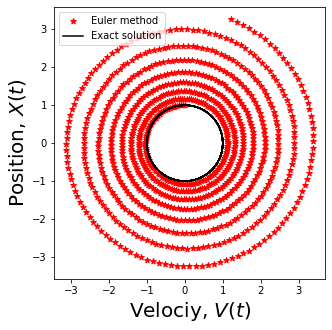

In [10]:
fig2, ax2 = plt.subplots(1,1, figsize=(5,5))
ax2.scatter(Y[:,1],Y[:,0], color='r' , marker="*", label= "Euler method")
ax2.plot(V_t(t),X_t(t), color='k', label="Exact solution")
ax2.set_aspect('equal')
ax2.set_xlabel("Velociy, $V(t)$" , fontsize=20)
ax2.set_ylabel("Position, $X(t)$" , fontsize=20)
ax2.legend()

**Clearly Euler method doesn't a good way to deal with the harmonic oscillator problem. Now, try to implement the Euler-Cromer to see a better result.**